## Correlations & Linear Regression Analysis – Hypothesis 1b
Hypothesis 1b: The greater the number of sign request per district, the greater the number of signs completed per day..
1.	Import libraries & set directory paths
2.	Import Portal data, check dimensions and data types
    -   Import: stone_signs_portal_v3.5_saleslets_lifecycle_district - 21,488.csv
3.	Hypothesis1b: “The greater the number of sign requests per district, the greater the average number of signs completed per day”.
    -	Calculate number of signs per district
    -	Calculate average number of sign requests completed per day per district
4.	Display as Scatterplot
5.	Calculate correlation strength on subset
6.	Linear Regression Analysis - not really suitable for such as small number of  data points.
    -	Create Numpy arrays
    -	Split into Training and Test Set
    -	Make linear prediction
    -	Review summary statistics:
        - Correlation Coefficient or Pearson's r: 
            - the strength of a relationship between the independent and dependent variable (-1 to +1)
        - R-Squared or Coefficient of Determination: 
            - a measure of how well the regression predictions approximate the real data points (%).
        - Root Mean Squared Error (RMSE): 
            - a single measure of predictive accuracy and explains the difference between the actual data points and the predicted data points (value relative to data, small error is better fit).
        - Slope Coefficient:  
            - The regression line fit to the data based on the 'rate of change of y as per X value' (%).
    
7.	Review summary statistics showed the R-squared value to be negative, indicating that the regression model does not fit the data.  No further work relevant on this area.

### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## import dataset: Sales and Letting with District

In [4]:
df_saleslet = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v3.5_saleslets_lifecycle_district - 21,488.csv'))
df_saleslet.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count,district,signs_per_district,average_completion_days
0,9215,13/10/2020 13:36,18/10/2020 08:52,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,13/10/2020,18/10/2020,83,26,1,BRIGHTON AND HOVE,5483,1.688152
1,9209,13/10/2020 13:29,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE,5483,1.688152
2,9209,09/03/2021 11:05,11/03/2021 14:05,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,09/03/2021,11/03/2021,73,122,2,BRIGHTON AND HOVE,5483,1.688152
3,12238,26/02/2021 10:39,28/02/2021 07:54,1.89,45.3,Oakley Property,OAK,OakleyProperty @BrightonSales,702,Sales,...,Sales,Standard 48hr,26/02/2021,28/02/2021,75,17,1,BRIGHTON AND HOVE,5483,1.688152
4,9210,13/10/2020 13:30,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE,5483,1.688152


### check dimensions & data types

In [5]:
df_saleslet.shape

(21488, 49)

In [6]:
df_saleslet.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
agent_name                   object
agent_code                   object
branch_name                  object
branch_code                   int64
sign_category                object
sign_action                  object
board_type                  float64
sign_type                    object
address_1                    object
address_2                    object
address_3                    object
town                         object
postcode                     object
latitude                    float64
longitude                   float64
quantity                      int64
additional_info              object
request_status               object
payment_status               object
net_charge                  float64
vat                         float64
gross_charge                float64
invoice_datetime            

## Hypothesis 1b: 
The greater the number of sign requests per district, the greater the average number of signs completed per day.

### calculate average number of signs completed per day

In [9]:
df_saleslet['avg_signs_completed_day'] = df_saleslet.groupby(['district']) ['completed_per_day'].transform(np.mean)
df_saleslet.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count,district,signs_per_district,average_completion_days,avg_signs_completed_day
0,9215,13/10/2020 13:36,18/10/2020 08:52,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Within Week,13/10/2020,18/10/2020,83,26,1,BRIGHTON AND HOVE,5483,1.688152,78.24658
1,9209,13/10/2020 13:29,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE,5483,1.688152,78.24658
2,9209,09/03/2021 11:05,11/03/2021 14:05,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Within Week,09/03/2021,11/03/2021,73,122,2,BRIGHTON AND HOVE,5483,1.688152,78.24658
3,12238,26/02/2021 10:39,28/02/2021 07:54,1.89,45.3,Oakley Property,OAK,OakleyProperty @BrightonSales,702,Sales,...,Standard 48hr,26/02/2021,28/02/2021,75,17,1,BRIGHTON AND HOVE,5483,1.688152,78.24658
4,9210,13/10/2020 13:30,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE,5483,1.688152,78.24658


### display as scatterplot

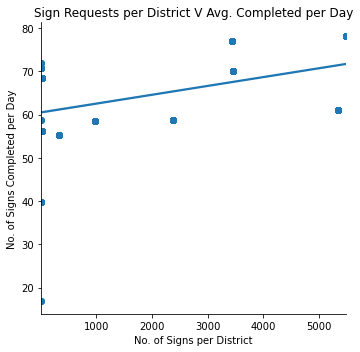

In [10]:
sns.lmplot(x= 'signs_per_district', y= 'avg_signs_completed_day', data= df_saleslet)

plt.title('Sign Requests per District V Avg. Completed per Day')
plt.xlabel('No. of Signs per District')
plt.ylabel('No. of Signs Completed per Day')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'H1b) Sign Requests per District V Average Completed per Day.png'))

The graph shows a mild positive correlation between the number of signs request per district and the average number of signs requests completed per day.

### export to CSV

In [11]:
df_saleslet.shape

(21488, 50)

In [12]:
df_saleslet.to_csv(os.path.join(dataset,'stone_signs_portal_v3.6_saleslets_lifecycle_district - 21,488.csv'), index=False)

### display correlation strength 
    create sub set containing 'signs_per_district' & 'avg_signs_completed_day'

In [13]:
df_district_complete = df_saleslet[['signs_per_district','avg_signs_completed_day']]
df_district_complete.head()

,signs_per_district,avg_signs_completed_day
0,5483,78.24658
1,5483,78.24658
2,5483,78.24658
3,5483,78.24658
4,5483,78.24658


### remove duplicates

In [14]:
df_district_complete.shape

(21488, 2)

In [15]:
df_district_complete = df_district_complete.drop_duplicates()
df_district_complete.shape

(14, 2)

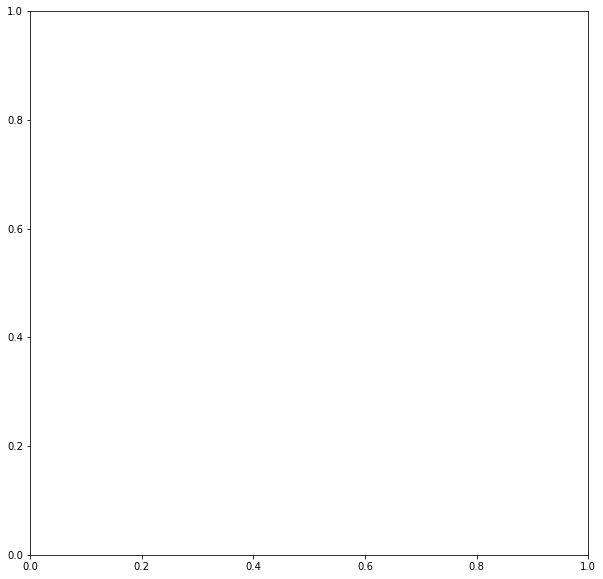

In [16]:
fig_size,axis = plt.subplots(figsize=(10,10))

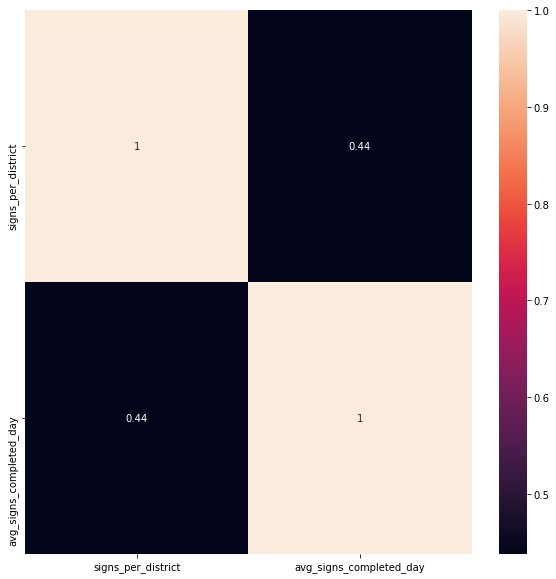

In [17]:
corr_district_complete = sns.heatmap(df_district_complete.corr(), annot= True, ax= axis)
corr_district_complete.figure

Correlation strength between the number of sign requests per District and the number of signs completed per day is +0.35, a moderate relationship.

### export subset for review

In [29]:
df_district_complete.to_csv(os.path.join(dataset,'x_district_complete_day - 14.csv'), index=False)

# Linear Regression Analysis
NB: There are not actually enough data points to carry out an effective linear regression.  The recommended number of data points hsould exceed 5,000 for effective model training.  However, the following script covers the Linear Regression process.

### reshape the data points into NumPy arrays, and place in seperate objects X (independent) and y (dependent)

In [18]:
X = df_district_complete['signs_per_district'].values.reshape(-1,1)
X

array([[5483],
       [3442],
       [5351],
       [2374],
       [3449],
       [ 332],
       [   3],
       [  29],
       [  23],
       [   7],
       [ 982],
       [   7],
       [   3],
       [   3]], dtype=int64)

In [19]:
y = df_district_complete['avg_signs_completed_day'].values.reshape(-1,1)
y

array([[78.24658034],
       [76.98692621],
       [61.01214726],
       [58.77295703],
       [70.06407654],
       [55.17771084],
       [72.        ],
       [68.44827586],
       [56.08695652],
       [70.85714286],
       [58.44501018],
       [39.85714286],
       [58.66666667],
       [17.        ]])

### split X and y data into Training and Test sets - 70:30

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### create a regression line to fit into the Training set

In [21]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Data is now trained on the Training set and must now be tested on the Test set.

### predict the values of y (Dependent) using X (Independent) on the Test set

In [22]:
y_predicted = regression.predict(X_test)

### create a plot that shows the regression line from the model Test set

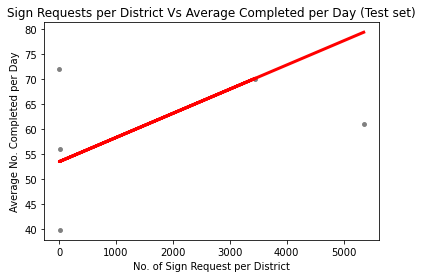

In [24]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)

plot_test.title('Sign Requests per District Vs Average Completed per Day (Test set)')
plot_test.xlabel('No. of Sign Request per District')
plot_test.ylabel('Average No. Completed per Day')

plt.savefig(os.path.join(vizpath,'H1b) Sign Requests per District V Completion Duration (Test Set).png'))

### calculate the summary statistics for the above plot

  - 1)	Correlation Coefficient or Pearson's r: the strength of a relationship between the independent and dependent variable (-1 to +1)
  - 2)	R-Squared or Coefficient of Determination: a measure of how well the regression predictions approximate the real data points (%).
  - 3)	Root Mean Squared Error (RMSE): a single measure of predictive accuracy and explains the difference between the actual data points and the predicted data points (value relative to data, small error is better fit).
  - 4)	Slope Coefficient:  The regression line fit to the data based on the 'rate of change of y as per X value' (%).

In [25]:
r2 = r2_score(y_test, y_predicted)
r2

-0.3063158372510837

In [26]:
mse = mean_squared_error(y_test, y_predicted)
mse

174.30557019734223

### print the predictive model statistics to assess the performance

In [27]:
print('R2 Score: ', r2)
print('Mean Squared Error (in units2): ', mse)
print('Slope Coefficient:' ,regression.coef_)

R2 Score:  -0.3063158372510837
Mean Squared Error (in units2):  174.30557019734223
Slope Coefficient: [[0.00483346]]


#### Interpretation:
  - A ngeative result for R-Squared mean the model does not follow the trend of the data, and renders the other statistic values useless, no further work required here.

### a review of actual values vs predicted values shows the model is no good

In [28]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data

,Actual,Predicted
0,56.086957,53.603812
1,72.000000,53.507143
2,70.064077,70.163260
3,39.857143,53.526477
4,61.012147,79.356508
